# Week 5 -- Univariate OLS Regression

This week we will explore a different approach at evaluating the results of the Likert survey.  We will assume an equal distance between each label as we did in assessing the **overall** score in week 2:

Label | Description | Percent Score
--|--|--
1 | strongly disagree | 0.20
2 | disagree | 0.40
3 | neutral | 0.60
4 | agree | 0.80
5 | strongly agree | 1.00

To make matters more interesting, we have a new dataset this week:

```demographic_detail.csv```

This dataset comprises the following metrics:

Attribute Name | Field Name | Type | Categorical | Restrictions | Description
--|--|--|--|--|--
Employee ID | ```employee_id``` |```int``` | No | 1 and above | Employee ID assigned at start of employment
Year of Birth | ```year_of_birth``` |```int``` | No |  | Calendar year in which the employee was born
Time on the Job | ```time_on_the_job``` |```int``` | No |  | Number of months since the employee joined the company



In [5]:
import pandas as pd 

## Q1: Merge Datasets

Merge the new dataset with the ```roster_with_score.csv``` data.  Save the resulting dataframe as a new csv: ```roster_with_score_2.csv```

In [6]:
# Read data and merge
r_df = pd.read_csv('roster_with_score.csv')
r_df.drop('Unnamed: 0', axis=1, inplace=True)
d_df = pd.read_csv('demographic_detail.csv')
d_df.drop('Unnamed: 0', axis=1, inplace=True)
df = r_df.merge(d_df, on='employee_id')

# Compare row counts and preview frame
print(' ~~ '.join([str(len(x)) for x in [r_df, d_df, df]]))
df.head()

381 ~~ 381 ~~ 381


,employee_id,title,last,first,manager_id,function,department,location,age,sex,...,tenure_id,seniority,alignment,development,enablement,engagement,leadership,overall,year_of_birth,time_on_the_job
0,343,CEO,Duran,Veronica,NaN,CEO,Leadership,"Mountain View, CA",35 - 44,F,...,2,4,0.800000,0.666667,0.733333,0.68,0.733333,0.722667,1978,22.885246
1,203,Administrative Assistant,Thompson,Anne,343.0,CEO,Leadership,"Mountain View, CA",45 - 54,F,...,3,0,0.800000,0.933333,0.933333,0.80,0.866667,0.866667,1976,37.967213
2,11,VP Engineering,Xiong,Steven,343.0,CEO,Engineering,"Mountain View, CA",35 - 44,M,...,4,3,0.933333,0.866667,1.000000,0.84,1.000000,0.928000,1983,70.360656
3,707,Administrative Assistant,Sanchez,Carolyn,11.0,CEO,Engineering,"Mountain View, CA",45 - 54,F,...,0,0,0.733333,0.800000,0.666667,0.76,0.466667,0.685333,1970,4.163934
4,417,Chief Technology Officer,Deleon,Amanda,343.0,CEO,Advanced Technology,"Mountain View, CA",35 - 44,F,...,2,2,0.933333,0.533333,0.733333,0.80,0.866667,0.773333,1977,19.540984


In [7]:
# Write data without index
df.to_csv('roster_with_score2.csv', index=False)

## Q2: Correlation Coefficients

Compute the correlation coefficients for the two new variables in the dataset against **overall** satisfaction.  (**HINT**: you may want to transform the year of birth before computing the correlation coefficient).

In [8]:
# Compute current age from birth year
from datetime import datetime
df['current_age'] = datetime.now().year - df['year_of_birth']
df.head()

,employee_id,title,last,first,manager_id,function,department,location,age,sex,...,seniority,alignment,development,enablement,engagement,leadership,overall,year_of_birth,time_on_the_job,current_age
0,343,CEO,Duran,Veronica,NaN,CEO,Leadership,"Mountain View, CA",35 - 44,F,...,4,0.800000,0.666667,0.733333,0.68,0.733333,0.722667,1978,22.885246,43
1,203,Administrative Assistant,Thompson,Anne,343.0,CEO,Leadership,"Mountain View, CA",45 - 54,F,...,0,0.800000,0.933333,0.933333,0.80,0.866667,0.866667,1976,37.967213,45
2,11,VP Engineering,Xiong,Steven,343.0,CEO,Engineering,"Mountain View, CA",35 - 44,M,...,3,0.933333,0.866667,1.000000,0.84,1.000000,0.928000,1983,70.360656,38
3,707,Administrative Assistant,Sanchez,Carolyn,11.0,CEO,Engineering,"Mountain View, CA",45 - 54,F,...,0,0.733333,0.800000,0.666667,0.76,0.466667,0.685333,1970,4.163934,51
4,417,Chief Technology Officer,Deleon,Amanda,343.0,CEO,Advanced Technology,"Mountain View, CA",35 - 44,F,...,2,0.933333,0.533333,0.733333,0.80,0.866667,0.773333,1977,19.540984,44


In [9]:
df[['overall','time_on_the_job']].corr()

,overall,time_on_the_job
overall,1.00000,0.46353
time_on_the_job,0.46353,1.00000


In [10]:
df[['overall','year_of_birth']].corr()

,overall,year_of_birth
overall,1.000000,0.051531
year_of_birth,0.051531,1.000000


In [11]:
df[['overall','current_age']].corr()

,overall,current_age
overall,1.000000,-0.051531
current_age,-0.051531,1.000000


### Correlation Analysis
- Time on the job is moderately positively correlated with overall satisfaction, suggesting `more experienced staff are more satisfied with their jobs`.
- Age is slightly negatively correlated with overall satisfaction, suggesting `younger staff are more satisfied with their jobs`. Year of birth shows an exact opposite correlation compared to age, because birth year has a perfect inverse correlation with age.

These two insights seem somewhat contradictary, as younger staff are less likely to have a long tenure. One possible explanation is that staff that join the company and don't leave are more satisfied, whereas there may be staff that started older and have less tenure that exhibit lower satisfaction.

## Q3: OLS Regression

Using the ```statsmodels``` OLS regression package perform and OLS regression of ```overall``` satisfaction vs. the two variables available in the in the dataset.

(a) which of the two regressions produces better results?

(b) what metric(s) are you using to make that assessment?

In [12]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default='plotly_mimetype+notebook_connected'

In [13]:
px.scatter(df, x='time_on_the_job', y='overall', title='Satisfaction by Tenure')

In [14]:
px.scatter(df, x='current_age', y='overall', title='Satisfaction by Age')

In [15]:
import seaborn as sns
sns.set_theme(color_codes=True)

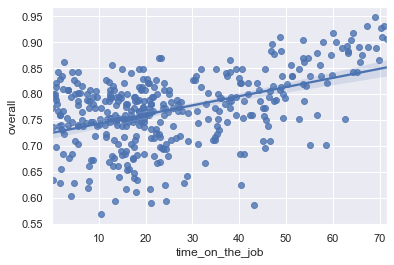

In [16]:
sns.regplot(data=df, x='time_on_the_job', y='overall');

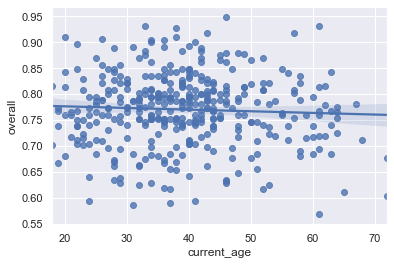

In [17]:
sns.regplot(data=df, x='current_age', y='overall');

In [18]:
import statsmodels.api as sm

In [19]:
# Setup X and Y variables for each regressor
Y = df['overall']
X1 = sm.add_constant(df['time_on_the_job'])
X2 = sm.add_constant(df['current_age'])

In [20]:
# Tenure regression
model1 = sm.OLS(Y, X1)
results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                overall   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     103.7
Date:                Thu, 10 Jun 2021   Prob (F-statistic):           1.08e-21
Time:                        20:27:12   Log-Likelihood:                 523.65
No. Observations:                 381   AIC:                            -1043.
Df Residuals:                     379   BIC:                            -1035.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.7253      0.005    133.686      0.000       0.715       0.736
time_on_the_job     0.0018      0.000     10.184      0.000       0.001       0.002
==============================================================================
Omnibus:                       23.783   Durbin-Watson:                   1.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.640
Skew:                          -0.642   Prob(JB):                     1.64e-06
Kurtosis:                       3.176   Cond. No.                         54.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
# Age regression
model2 = sm.OLS(Y, X2)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                overall   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.009
Date:                Thu, 10 Jun 2021   Prob (F-statistic):              0.316
Time:                        20:27:12   Log-Likelihood:                 478.08
No. Observations:                 381   AIC:                            -952.2
Df Residuals:                     379   BIC:                            -944.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7828      0.013     60.674      0.000       0.757       0.808
current_age    -0.0003      0.000     -1.005      0.316      -0.001       0.000
==============================================================================
Omnibus:                        4.078   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.130   Jarque-Bera (JB):                3.868
Skew:                          -0.241   Prob(JB):                        0.145
Kurtosis:                       3.104   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Regression Analysis
As we can see clearly from the plots, and is confirmed by the regression models, tenure is a much better predictor of satisfaction than age. Based on the summary results of our OLS models, we can see that the t statistic for tenure (time_on_the_job) is over 10, while for age it is only slightly larger than 1. We can also see that the p value (probability of obtaining the result assuming null hypothesis is true) for tenure is 0, while it is 0.3 for age. Based on these statistics, age is not a significant predictor for satisfaction, while tenure is.

## Q4: Residual Analysis

Inspect the residuals of the two regressions. 

(a) Are they normally distributed?

(b) Do you notice any significant outliers?

(c) Do you observe anything else of concern?

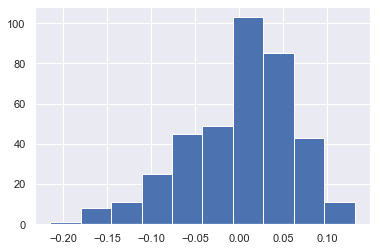

In [22]:
results1.resid.hist();

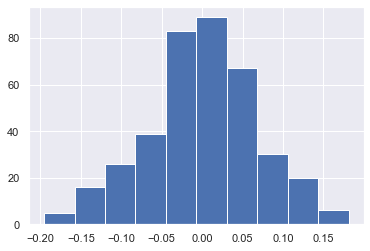

In [23]:
results2.resid.hist();

In [24]:
from scipy import stats
import matplotlib.pylab as plt 

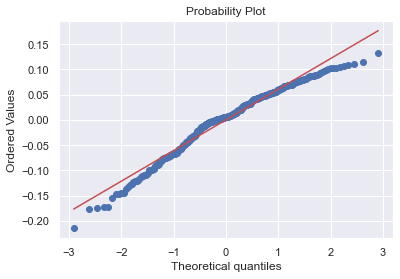

In [25]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
res = stats.probplot(results1.resid, dist=stats.norm, plot=ax1)
plt.show()

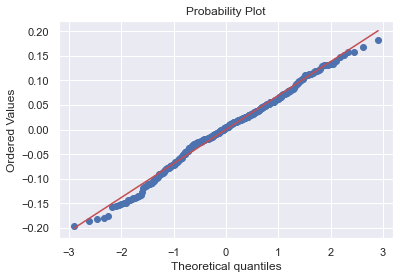

In [26]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
res = stats.probplot(results2.resid, dist=stats.norm, plot=ax2)
plt.show()

### Residual Analysis
Based on the histograms and probability plots above, the residuals appear to be fairly normally distributed. There are a few outliers in the Tenure chart, and there does appear to be some share to residuals that differs from the normal distribution. Given that the skew is relatively minor and we are performing univariate regression, the normality of the residuals is considered sufficient.

# Q5: Business Insights

How do you interpret the results of the regressions?

What do you recommend based on this analysis?

## Insights
Based on the regressions, it is clear that tenure has a significant impact on satisfaction, with employees who stay with the company being more satisfied. It is possible that there is a confounding variable in this situation that less satisfied employees are more likely to leave, and therefore satisfied employees are more likely to stay with the company.

That being said, the data does suggest that the company should invest in employee retention efforts and initiatives, which are likely to improve satisfaction. These two factors are likely to have a complementary effect, where satisfaction improves retention which in turn increases satisfaction.

In [28]:
!jupyter nbconvert --to html --template full Loantronic_Regression.ipynb

[NbConvertApp] Converting notebook Loantronic_Regression.ipynb to html
[NbConvertApp] Writing 722306 bytes to Loantronic_Regression.html
